In [51]:

#TASK 1 ( Import Libraries and Datasets )
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
df=pd.read_csv('online_shoppers_intention.csv')

In [32]:
#TASK 3 ( Perform Exploratory Data Analysis )
# Get an overview of the dataset
print(df.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [33]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [34]:
# Check for missing values
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [35]:
# Handle missing values if necessary
# For example, you can drop rows with missing values using: df.dropna(inplace=True)

# Explore basic statistics of numerical columns
print(df.describe())

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

In [36]:
# Explore categorical columns
print(df['VisitorType'].value_counts())

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


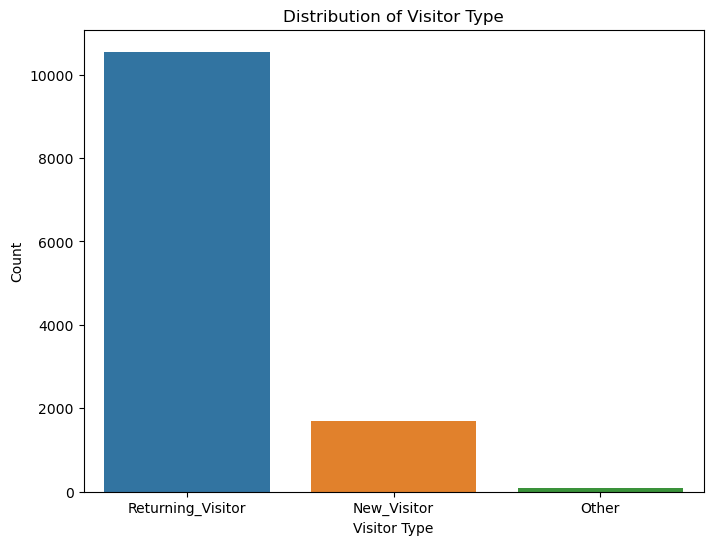

In [61]:
#TASK 4 ( Perform Data Visualization )
# Example data visualization: Bar plot of the Visitor Type
plt.figure(figsize=(8, 6))
sns.countplot(x='VisitorType', data=df)
plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.title('Distribution of Visitor Type')
plt.show()


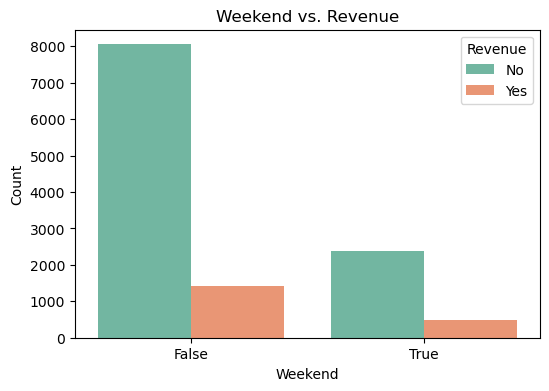

In [65]:
#  Bar Plot: Weekend vs. Revenue
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Weekend', hue='Revenue', palette='Set2')
plt.title('Weekend vs. Revenue')
plt.xlabel('Weekend')
plt.ylabel('Count')
plt.legend(title='Revenue', labels=['No', 'Yes'])
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_11980\2245282120.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='OperatingSystems', y='BounceRates', data=df, ci=None, palette='viridis')


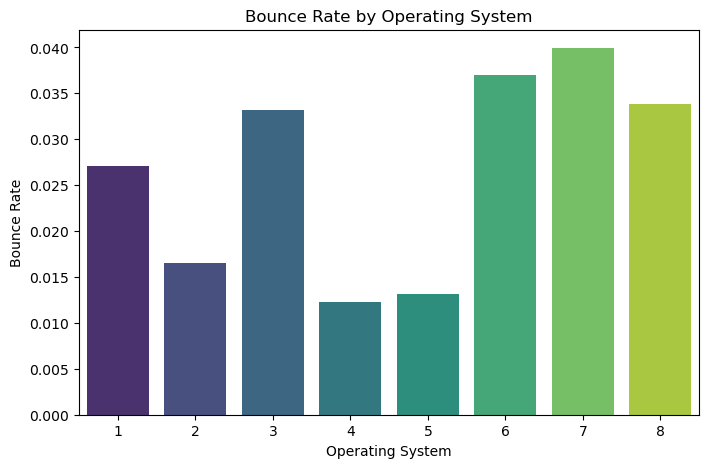

In [66]:
# 4. Bar Plot: Operating Systems vs. Bounce Rate
plt.figure(figsize=(8, 5))
sns.barplot(x='OperatingSystems', y='BounceRates', data=df, ci=None, palette='viridis')
plt.title('Bounce Rate by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Bounce Rate')
plt.show()

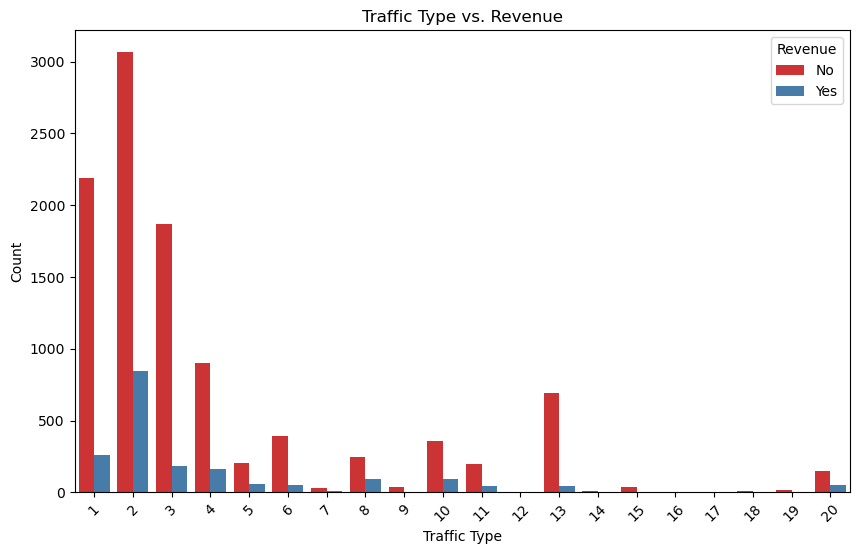

In [67]:
# 5. Bar Plot: Traffic Type vs. Revenue
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TrafficType', hue='Revenue', palette='Set1')
plt.title('Traffic Type vs. Revenue')
plt.xlabel('Traffic Type')
plt.ylabel('Count')
plt.legend(title='Revenue', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


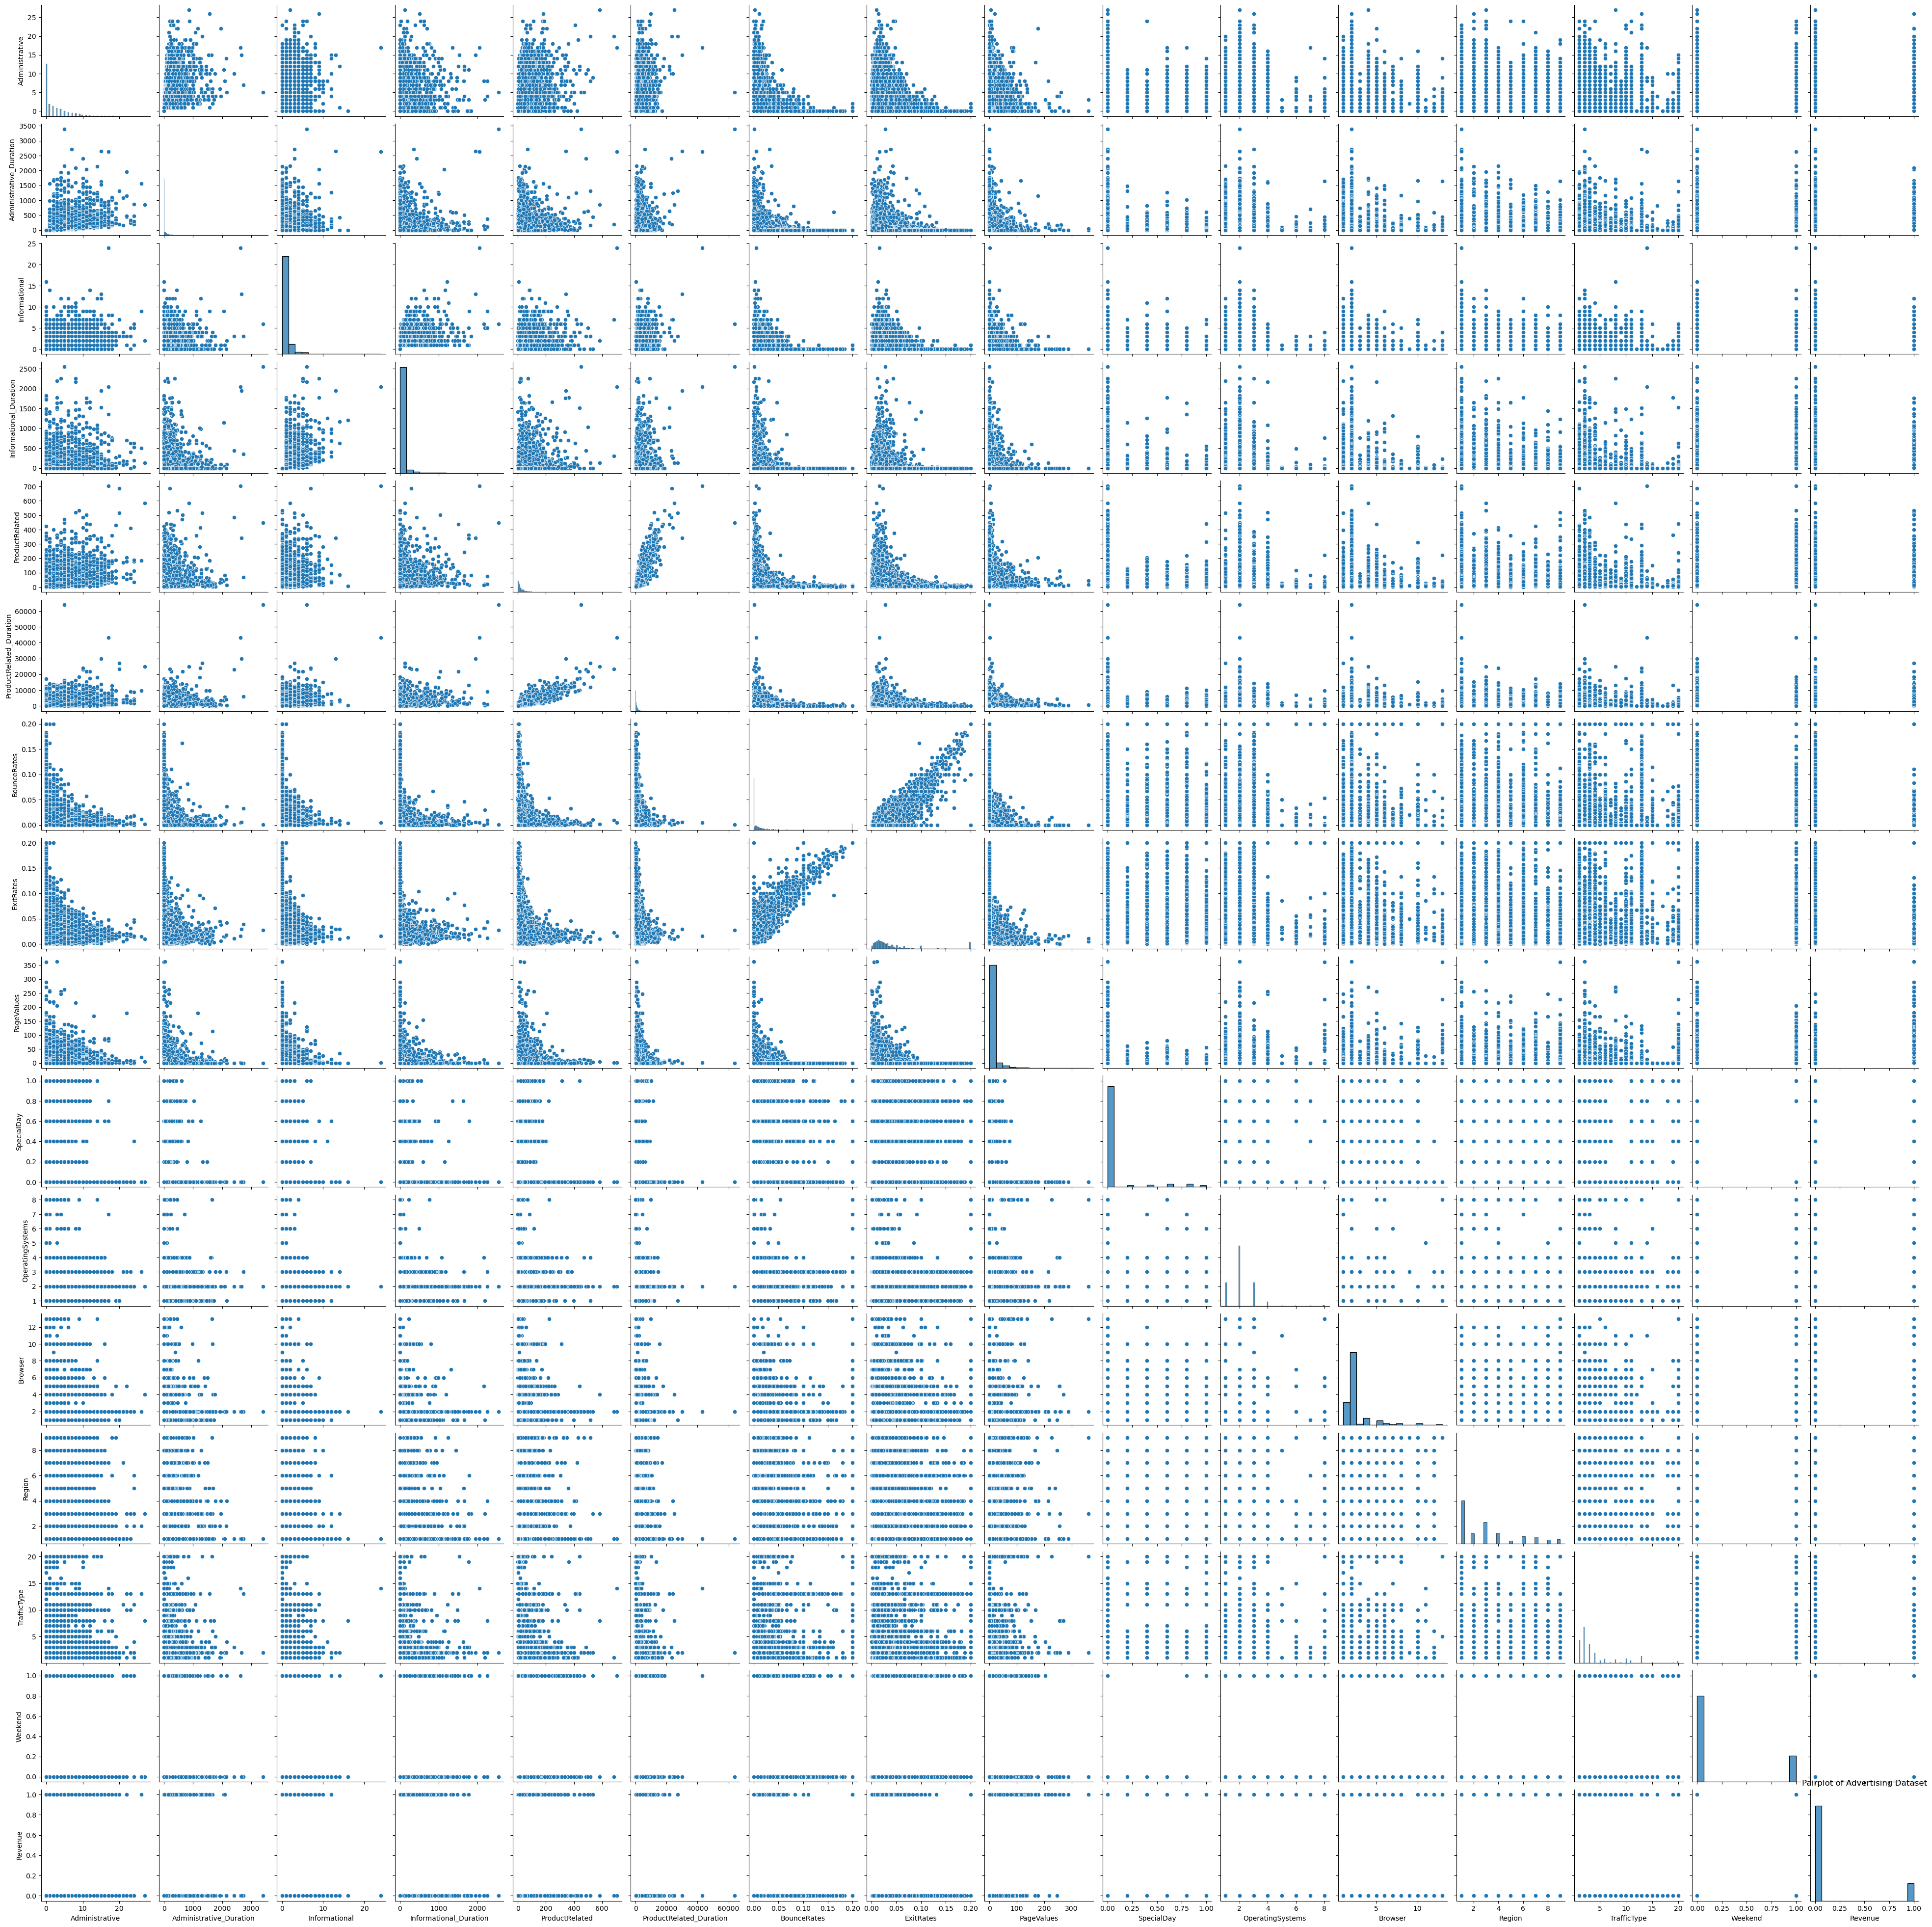

In [62]:

#Pairplot: A matrix of scatterplots for visualizing relationships between all pairs of variables.
sns.pairplot(df)
plt.title('Pairplot of Advertising Dataset')
plt.show()



C:\Users\hp\AppData\Local\Temp\ipykernel_11980\650919710.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


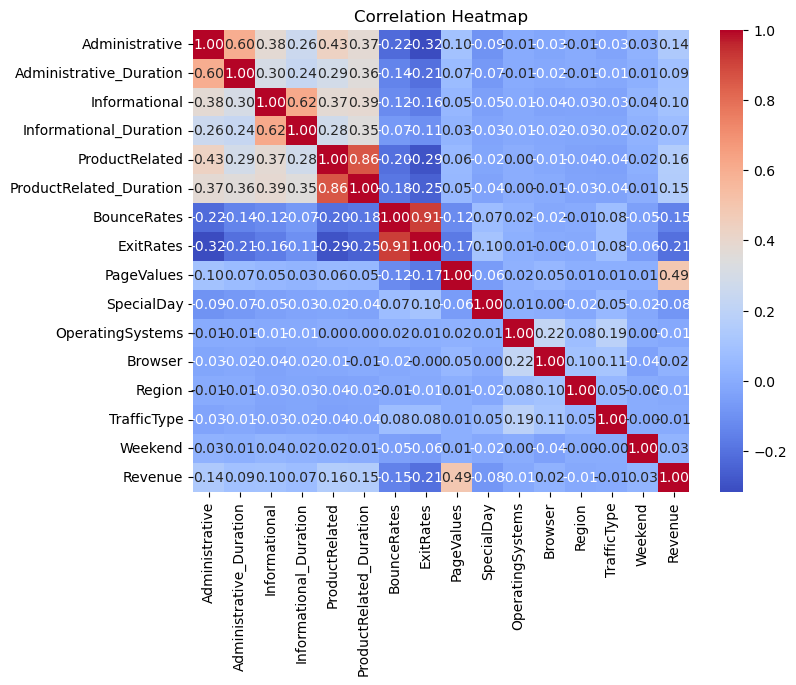

In [63]:

#Heatmap of Correlations: A heatmap showing the correlation between variables.

correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [64]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# If there are missing values, you can choose to drop or impute them.
# For example, to drop rows with missing values:
df.dropna(inplace=True)



Missing Values:
 Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [41]:
print(df.columns)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


In [45]:
df_encoded = pd.get_dummies(df, columns=['Month', 'VisitorType', 'Weekend'])


In [47]:
X = df_encoded.drop('Revenue', axis=1)  # Features (excluding the 'Revenue' column)
y = df_encoded['Revenue']  # Target variable: 'Revenue'


In [49]:
# Split the dataset into a training set and a testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# 1. Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
 #2. Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

In [57]:
# 3. Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [59]:
# Evaluate the models
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

Logistic Regression Accuracy: 0.8690186536901865
Random Forest Accuracy: 0.8917274939172749
SVM Accuracy: 0.8349553933495539


In [60]:
# Classification reports
print("\nClassification Report - Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("\nClassification Report - Random Forest:\n", classification_report(y_test, y_pred_rf))
print("\nClassification Report - SVM:\n", classification_report(y_test, y_pred_svm))


Classification Report - Logistic Regression:
               precision    recall  f1-score   support

       False       0.88      0.97      0.93      2055
        True       0.72      0.36      0.47       411

    accuracy                           0.87      2466
   macro avg       0.80      0.66      0.70      2466
weighted avg       0.85      0.87      0.85      2466


Classification Report - Random Forest:
               precision    recall  f1-score   support

       False       0.91      0.96      0.94      2055
        True       0.74      0.54      0.62       411

    accuracy                           0.89      2466
   macro avg       0.83      0.75      0.78      2466
weighted avg       0.88      0.89      0.88      2466


Classification Report - SVM:
               precision    recall  f1-score   support

       False       0.83      1.00      0.91      2055
        True       0.83      0.01      0.02       411

    accuracy                           0.83      2466
   macro 